In [ ]:
# Uploading Corn_maize.zip to Google Drive and connecting it to Google Colab
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the ZIP file
zip_file_path = '/content/drive/My Drive/Corn_maize.zip'

# Optional: Extract the ZIP file if needed
import zipfile
import os

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/Corn_maize')

# Now you can access the extracted files in /content/Corn_maize
extracted_path = '/content/Corn_maize'
print("Files extracted to:", extracted_path)


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install necessary packages
!pip install pyunpack
!pip install patool

# Create a folder "Corn" in /content and extract the zip file to that folder
from pyunpack import Archive
import os

# Define the path to the ZIP file and the extraction folder
zip_file_path = '/content/drive/MyDrive/Corn_Maize.zip'
extraction_folder = '/content/Corn'

# Create the extraction folder if it doesn't exist
os.makedirs(extraction_folder, exist_ok=True)

# Extract the ZIP file
Archive(zip_file_path).extractall(extraction_folder)

print(f"Files extracted to: {extraction_folder}")


In [ ]:
#importing required packages
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle


In [ ]:
#creating categories of Corn leaf types
Categories=['Blight','Common_Rust','Gray_Leaf_Spot','Healthy']
print("Type y to give categories or type n to go with classification of Other");

In [ ]:
# Creating categories of Corn leaf types
Categories = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
print("Type 'y' to give categories or type 'n' to go with classification of 'Other'")

# Prompt for valid input
while True:
    check = input()
    if check == 'n' or check == 'y':
        break
    print("Please give a valid input (y/n)")

if check == 'y':
    print("Enter how many types of images you want to classify")
    n = int(input())
    Categories = []
    print(f'Please enter {n} names')
    for i in range(n):
        name = input()
        Categories.append(name)
    print(f"If not using Google Drive, please upload all the {n} category images in Google Colab with the same names as given in categories")


In [ ]:

# Please use datadir='/content' if the files are uploaded onto Google Colab
# else mount the drive and give path of the parent-folder containing all category images folders
datadir = '/content/Corn/data'

for i in Categories:
    print(f'loading... category : {i}')
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (64, 64, 3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category: {i} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

df = pd.DataFrame(flat_data)
df['Target'] = target

print(df)


loading... category : Blight

loaded category:Blight successfully

loading... category : Common_Rust

loaded category:Common_Rust successfully

loading... category : Gray_Leaf_Spot

loaded category:Gray_Leaf_Spot successfully

loading... category : Healthy

loaded category:Healthy successfully



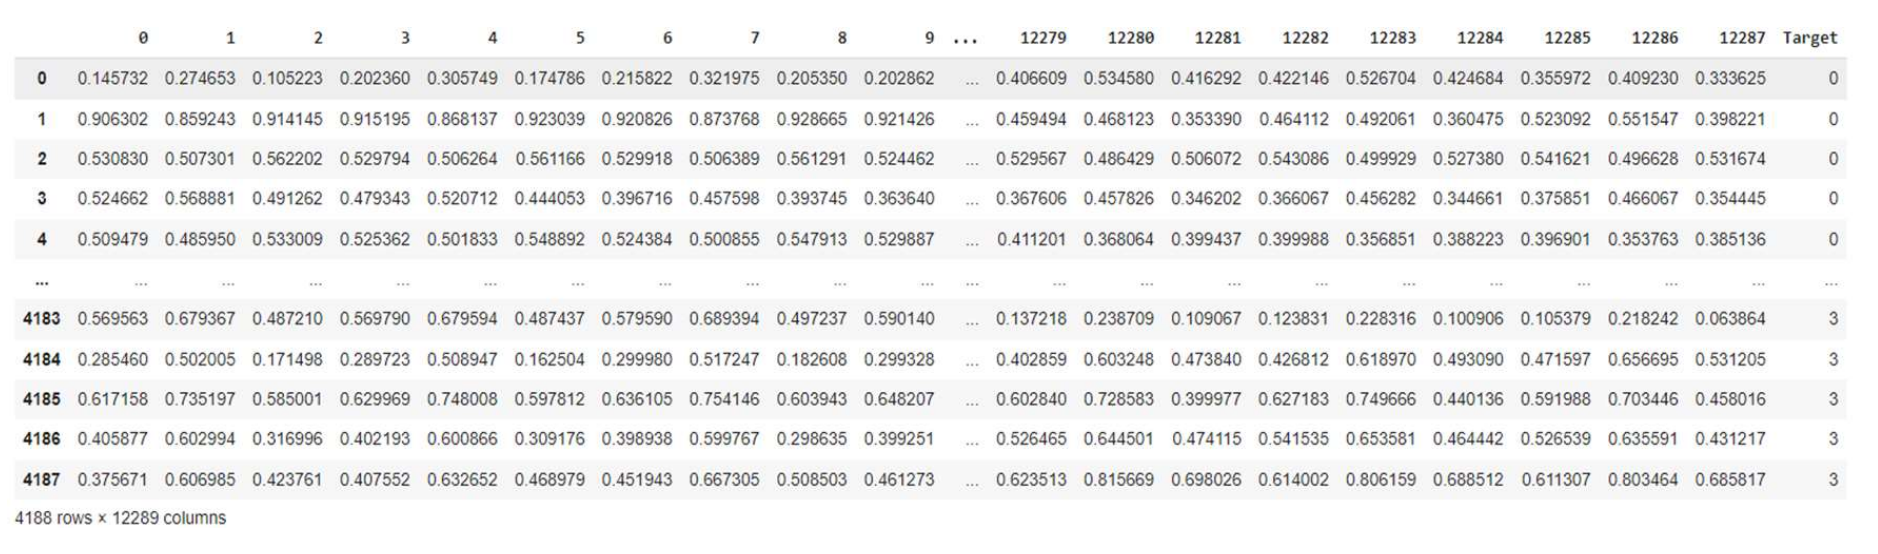

In [ ]:
#Splitting
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully

In [ ]:
param_grid = {'C': [0.1, 1], 'gamma': [0.001, 0.1], 'kernel': ['rbf']}
svc = svm.SVC(probability=True)

print("The training of the model is started, please wait for a while as it may take a few minutes to complete")

model = GridSearchCV(svc, param_grid)
model.fit(x_train, y_train)

print('The model is trained well with the given images')
print("Best parameters found: ", model.best_params_)

The training of the model is started, please wait for while as it may take few minutes to
complete

The Model is trained well with the given images

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
# Predicted data
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

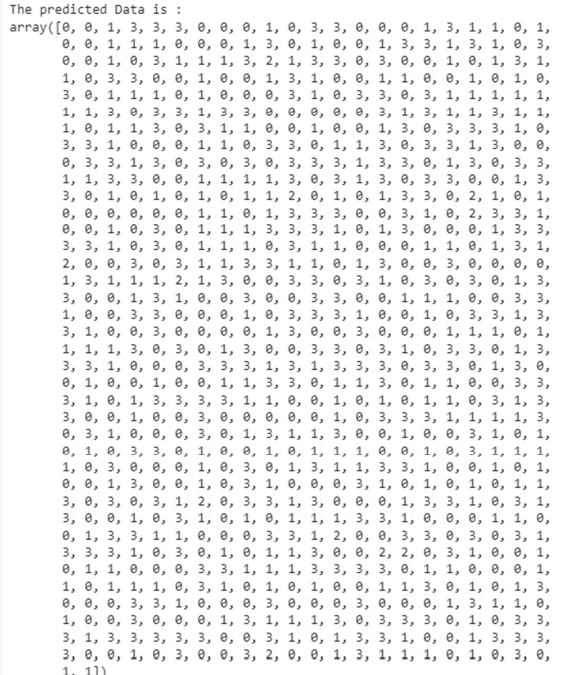

In [ ]:
#Actual data
print("The actual data is:")
np.array(y_test)

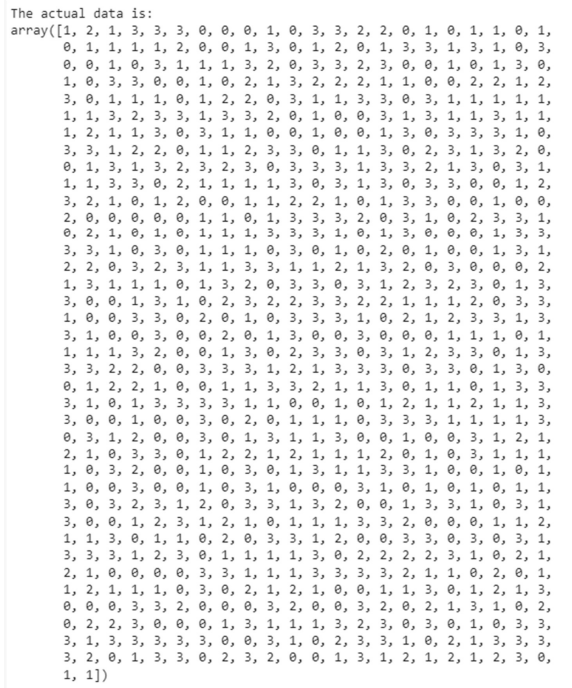

In [ ]:
#Classification Report and Confusion Matrix
print('Classification Report:')
print(classification_report(y_pred,y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print('Confusion_matrix:')
print(confusion_matrix(y_pred,y_test))


Classification Report:

 precision recall f1-score support

 0 0.93 0.66 0.77 319

 1 0.95 0.93 0.94 265

 2 0.08 0.82 0.14 11

 3 1.00 0.95 0.97 243

 accuracy 0.84 838

36

 macro avg 0.74 0.84 0.71 838

weighted avg 0.94 0.84 0.88 838

The model is 83.53221957040573% accurate

```

Classification Report:
 precision recall f1-score support
 0 0.93 0.66 0.77 319
 1 0.95 0.93 0.94 265
 2 0.08 0.82 0.14 11
 3 1.00 0.95 0.97 243
 accuracy 0.84 838
36
 macro avg 0.74 0.84 0.71 838
weighted avg 0.94 0.84 0.88 838
The model is 83.53221957040573% accurate
```





In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_pred,y_test, digits=4))



```
precision recall f1-score support
 0 0.9258 0.6646 0.7737 319
 1 0.9464 0.9321 0.9392 265
 2 0.0783 0.8182 0.1429 11
 3 0.9957 0.9547 0.9748 243
 accuracy 0.8353 838
 macro avg 0.7365 0.8424 0.7076 838
weighted avg 0.9414 0.8353 0.8761 838
```



In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, random_state = 42)
model.fit(x_train,y_train)

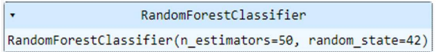

In [ ]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print('Classification report:')
print(classification_report(y_pred,y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print('Confusion_matrix:')
print(confusion_matrix(y_pred,y_test))
import sklearn.metrics as metrics
print(metrics.classification_report(y_pred,y_test, digits=4))



```
Classification report:
 precision recall f1-score support
 0 0.88 0.65 0.75 309
 1 0.93 0.98 0.96 249
 2 0.20 0.55 0.29 42
 3 0.92 0.90 0.91 238
 accuracy 0.81 838
 macro avg 0.73 0.77 0.73 838
weighted avg 0.87 0.81 0.83 838
The model is 81.38424821002387% accurate
```





```
precision recall f1-score support
 0 0.8777 0.6505 0.7472 309
 1 0.9349 0.9799 0.9569 249
 2 0.2000 0.5476 0.2930 42
 3 0.9185 0.8992 0.9087 238
 accuracy 0.8138 838
 macro avg 0.7328 0.7693 0.7264 838
weighted avg 0.8723 0.8138 0.8326 838
```



In [ ]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

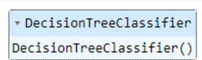

In [ ]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print('Classification report:')
print(classification_report(y_pred,y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print('Confusion_matrix:')
print(confusion_matrix(y_pred,y_test))
import sklearn.metrics as metrics
print(metrics.classification_report(y_pred,y_test, digits=4))




```
Classification report:
 precision recall f1-score support
 0 0.59 0.66 0.62 205
 1 0.93 0.92 0.92 264
 2 0.40 0.38 0.39 120
 3 0.83 0.78 0.80 249
 accuracy 0.74 838
 macro avg 0.69 0.68 0.69 838
weighted avg 0.74 0.74 0.74 838
The model is 73.62768496420048% accurate
```





```
precision recall f1-score support
 0 0.5895 0.6585 0.6221 205
 1 0.9272 0.9167 0.9219 264
 2 0.4000 0.3833 0.3915 120
 3 0.8326 0.7791 0.8050 249
 accuracy 0.7363 838
 macro avg 0.6873 0.6844 0.6851 838
weighted avg 0.7410 0.7363 0.7379 838
```



In [ ]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)


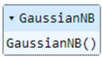

In [ ]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print('Classification report:')
print(classification_report(y_pred,y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print('Confusion_matrix:')
print(confusion_matrix(y_pred,y_test))
import sklearn.metrics as metrics
print(metrics.classification_report(y_pred,y_test, digits=4))




```
Classification report:
 precision recall f1-score support
39
 0 0.71 0.63 0.67 257
 1 0.94 0.90 0.92 271
 2 0.43 0.45 0.44 110
 3 0.77 0.90 0.83 200
 accuracy 0.76 838
 macro avg 0.71 0.72 0.71 838
weighted avg 0.76 0.76 0.76 838
The model is 76.0143198090692% accurate
```





```
precision recall f1-score support
 0 0.7118 0.6342 0.6708 257
 1 0.9387 0.9041 0.9211 271
 2 0.4261 0.4455 0.4356 110
 3 0.7725 0.9000 0.8314 200
 accuracy 0.7601 838
 macro avg 0.7123 0.7209 0.7147 838
weighted avg 0.7622 0.7601 0.7592 838

```



In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)

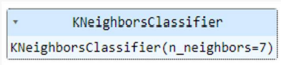

In [ ]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print('Classification report:')
print(classification_report(y_pred,y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print('Confusion_Matrix:')
print(confusion_matrix(y_pred,y_test))
import sklearn.metrics as metrics
print(metrics.classification_report(y_pred,y_test, digits=4))



```
Classification report:
 precision recall f1-score support
40
 0 0.76 0.67 0.71 258
 1 0.90 0.99 0.94 237
 2 0.33 0.52 0.40 73
 3 0.97 0.84 0.90 270
 accuracy 0.80 838
 macro avg 0.74 0.75 0.74 838
weighted avg 0.83 0.80 0.81 838
The model is 80.1909307875895% accurate
```





```
precision recall f1-score support
 0 0.7555 0.6705 0.7105 258
 1 0.8966 0.9873 0.9398 237
 2 0.3304 0.5205 0.4043 73
 3 0.9742 0.8407 0.9026 270
 accuracy 0.8019 838
 macro avg 0.7392 0.7548 0.7393 838
weighted avg 0.8288 0.8019 0.8105 838
```



In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


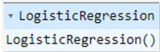

In [ ]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print('Classification report:')
print(classification_report(y_pred,y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print('Confusion_Matrix:')
print(confusion_matrix(y_pred,y_test))
import sklearn.metrics as metrics
print(metrics.classification_report(y_pred,y_test, digits=4))



```
Classification report:
 precision recall f1-score support
 0 0.76 0.75 0.75 233
 1 0.94 0.91 0.92 270
 2 0.45 0.62 0.52 84
 3 0.97 0.90 0.94 251
 accuracy 0.83 838
 macro avg 0.78 0.79 0.78 838
weighted avg 0.85 0.83 0.84 838
The model is 83.29355608591885% accurate
```





```
precision recall f1-score support
 0 0.7598 0.7468 0.7532 233
 1 0.9387 0.9074 0.9228 270
 2 0.4522 0.6190 0.5226 84
 3 0.9742 0.9044 0.9380 251
 accuracy 0.8329 838
 macro avg 0.7812 0.7944 0.7842 838
weighted avg 0.8508 0.8329 0.8401 838

```



In [ ]:
#Ada Booster
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(x_train,y_train)

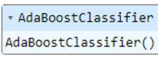

In [ ]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print('Classification report:')
print(classification_report(y_pred,y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print('Confusion_Matrix:')
print(confusion_matrix(y_pred,y_test))
import sklearn.metrics as metrics
print(metrics.classification_report(y_pred,y_test, digits=4))



```
Classification report:
 precision recall f1-score support
 0 0.84 0.59 0.70 323
 1 0.92 0.97 0.95 248
 2 0.23 0.51 0.31 51
 3 0.82 0.88 0.85 216
 accuracy 0.77 838
 macro avg 0.70 0.74 0.70 838
weighted avg 0.82 0.77 0.79 838
The model is 77.44630071599046% accurate
 precision recall f1-score support
 0 0.8384 0.5944 0.6957 323
 1 0.9234 0.9718 0.9470 248
 2 0.2261 0.5098 0.3133 51
 3 0.8155 0.8796 0.8463 216
 accuracy 0.7745 838
 macro avg 0.7008 0.7389 0.7005 838
weighted avg 0.8204 0.7745 0.7856 838
```



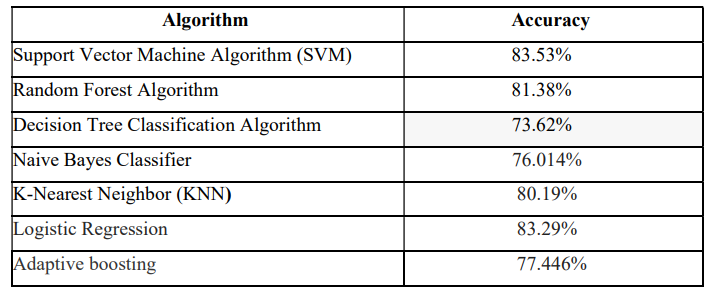